In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cancer Dataset Load**

In [193]:
cancer_data = pd.read_csv("/Users/purnendubikashjana/Documents/survey lung cancer.csv")

**EDA**

In [214]:
cancer_data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [195]:
# Rows and Columns
cancer_data.shape

(309, 15)

In [196]:
# Summary of dataset, Columns
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [197]:
# Checking for Null value
cancer_data.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [198]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(14), object(1)

**VISUALIZATION**

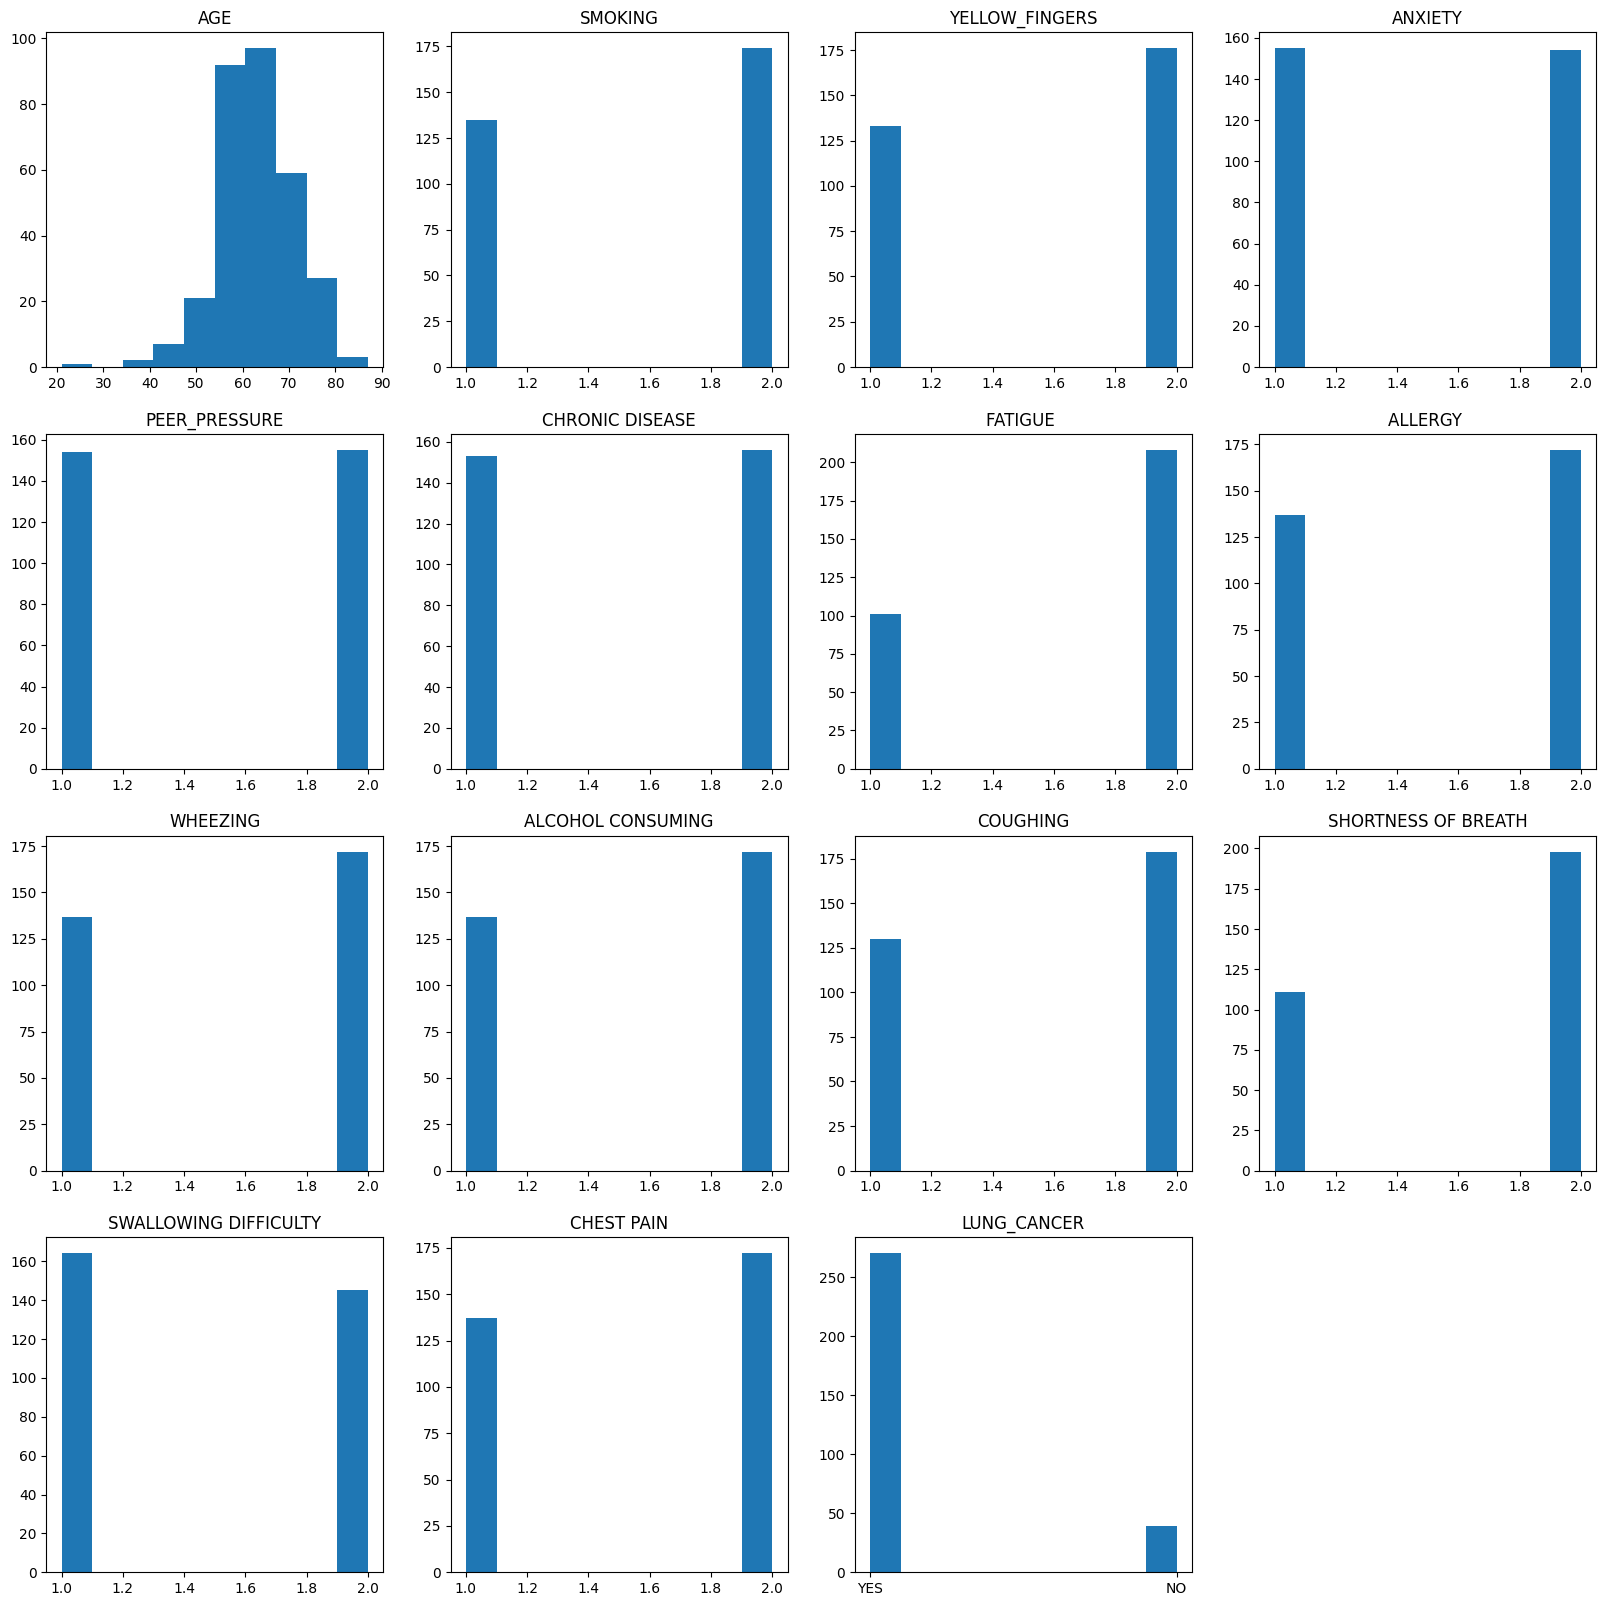

In [199]:
plt.figure(figsize = (20,20))
j = 1
for i in cancer_data.columns:
    plt.subplot(4,4,j)
    plt.title(f'{i}')
    plt.hist(cancer_data[i])
    j += 1
plt.show()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


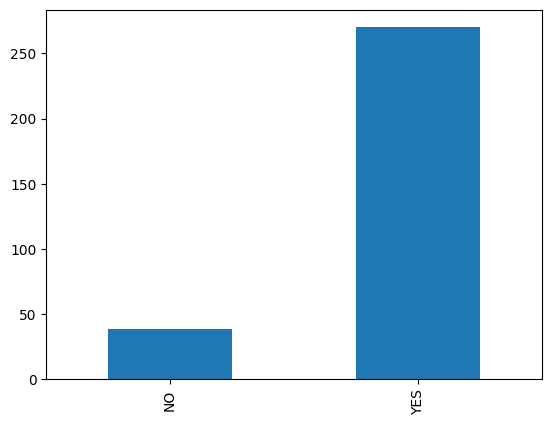

In [200]:
# LUNG CANCER Column Data
cancer_data.LUNG_CANCER.value_counts().sort_values().plot(kind = 'bar')
print(cancer_data.LUNG_CANCER.value_counts())

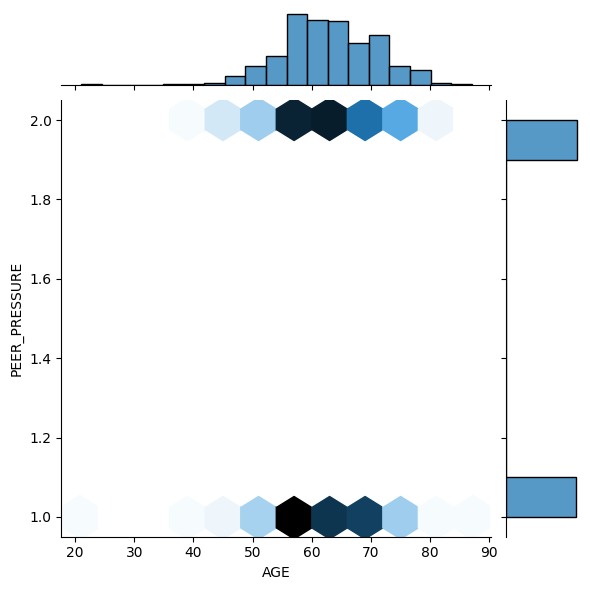

In [205]:
sns.jointplot(x = "AGE", y = "PEER_PRESSURE", kind = 'hex', data = cancer_data)

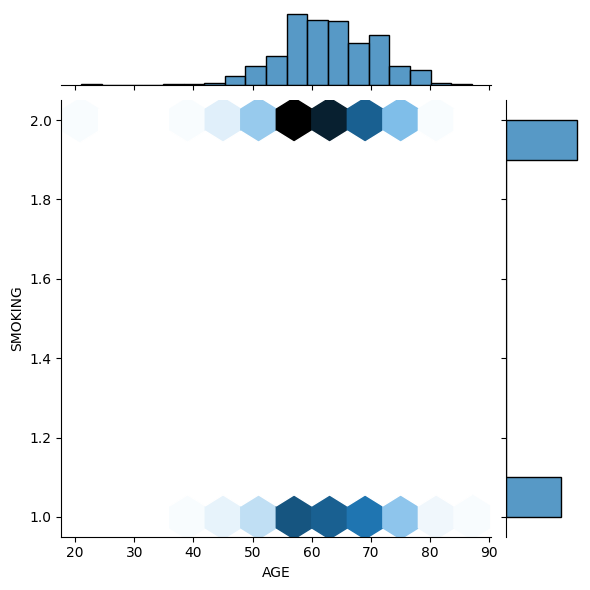

In [206]:
sns.jointplot(x = "AGE", y = "SMOKING", kind = 'hex', data = cancer_data)

In [207]:
# # Split dataset into Independent and Dependent features
# X=cancer_data.iloc[:,:-1]
# y=cancer_data.iloc[:,-1]

In [215]:
X = cancer_data.drop('LUNG_CANCER', axis=1)
y = cancer_data['LUNG_CANCER']

# With Random State = 0
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# At Random State = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Naive Bayes Classifier**

In [216]:
from sklearn.naive_bayes import GaussianNB

In [217]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [218]:
y_prediction = NB_model.predict(X_test)
y_prediction

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES'], dtype='<U3')

In [220]:
NB_Accuracy = accuracy_score(y_test, y_prediction)*100

# Random State = 0
# print ('\tNAIVE BAYES CLASSIFIER - Random State = 0\n\n\tAccuracy of Naive Bayes Classifier Model is : ', NB_Accuracy)

# Random State = 42
print ('\tNAIVE BAYES CLASSIFIER - Random State = 42\n\n\tAccuracy of Naive Bayes Classifier Model is : ', NB_Accuracy)

	NAIVE BAYES CLASSIFIER - Random State = 42

	Accuracy of Naive Bayes Classifier Model is :  95.6989247311828
